# 密度比

## 密度比の推定

## ライブラリなど読み込み

In [18]:
import numpy as np               
import matplotlib.pyplot as plt 
from scipy.stats import norm
from common.DensityRatio import kernelDensityRatio  # 密度比スクリプト

## データ生成

In [19]:
# データ設定 
n, m = 100, 200
tr_mean, tr_sd = -0.5, 1
te_mean, te_sd = 0.5, 0.8
# データ生成
dat_tr = np.random.normal(loc=tr_mean, scale=tr_sd, size=n).reshape(n,1)
dat_te = np.random.normal(loc=te_mean, scale=te_sd, size=m).reshape(m,1)

## 確率分布と密度比の計算

In [20]:
newdat = np.linspace(-4,6,500).reshape(500,1)  # 予測点
Prob_tr =  norm.pdf(newdat, tr_mean, tr_sd)      # 確率密度の計算
Prob_te = norm.pdf(newdat, te_mean, te_sd)
ratio = Prob_te/Prob_tr                              # 予測点上での真の密度比

## プロット：密度比

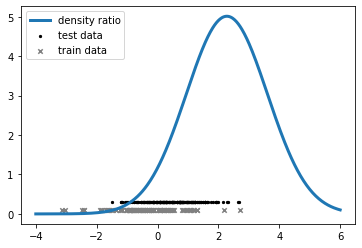

In [21]:
# 真の密度比関数のプロット
plt.plot(newdat,ratio, lw=3, label="density ratio")
# データ点のプロット
plt.scatter(dat_te.reshape(-1), np.repeat(0.3,m),marker='.',c='black',s=20, label="test data")
plt.scatter(dat_tr.reshape(-1), np.repeat(0.1,n),marker='x',c='gray',s=20, label="train data")
plt.legend(); plt.show()

## 密度比の推定
DensityRatio.kernelDensityRatio 

In [22]:
# 以下のカーネル幅で推定
dr = kernelDensityRatio(gamma=0.5)
dr.fit(dat_tr, dat_te)                   # データへのフィッティング
drp = dr.predict(newdat)            # 密度比の予測値

## プロット：密度比の推定結果

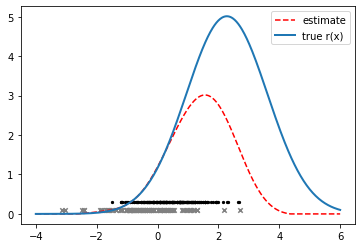

In [23]:
plt.plot(newdat,drp, c='red',linestyle='dashed',label='estimate')  # 密度比の推定結果をプロット
plt.plot(newdat,ratio,lw=2,label='true r(x)')                                     # 真の密度比関数のプロット
plt.scatter(dat_te.reshape(-1), np.repeat(0.3,m),marker='.',c='black',s=20) 
plt.scatter(dat_tr.reshape(-1), np.repeat(0.1,n),marker='x',c='gray',s=20)
plt.legend(); plt.show()

## 異常検知

## データ読み込み：手書き数字の画像

label = 4


<Figure size 432x288 with 0 Axes>

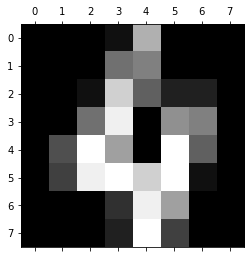

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
idx = 4
print("label =",digits.target[idx])
plt.gray(); plt.matshow(digits.images[idx]); plt.show()

## データ生成
- 正常データ："1"の画像
- 調べるデータ："1"と"7"の画像． "7"は少ない

- 各データは64次元 (8 x 8 の画像)
- 調べるデータ tr:   最初の 10 個のデータ が "7"， 他は "1"

In [25]:
x1 = digits.images[digits.target==1,]; x1=x1.reshape(x1.shape[0],64)
x2 = digits.images[digits.target==7,]; x2=x2.reshape(x2.shape[0],64)

te = x1[np.random.randint(0, x1.shape[0], (100,))]             # 正常データ
tr =  np.r_[x2[np.random.randint(0, x2.shape[0], (10,))],     # 調べるデータ
            x1[np.random.randint(0, x1.shape[0], (100,))]]

## 密度比の推定：

In [26]:
dr = kernelDensityRatio(gamma=0.1)
dr.fit(tr, te)
drp = dr.predict(tr)

## 密度比を小さい順に並べ替え

In [27]:
outlier_rank = np.argsort(drp)
print(outlier_rank)

[  7   0   4   1   6   5   9   2   3   8 103  34  11  65  50  80  27  71
  69  57 101  41  54  49  72  38  60  32  95  94  17  39  90 105  97 102
  98  93 108  51  83  58  52  64  67  46  89  77  66 100  45  82  84  36
  59  13  44  22  25  40  20  76  63  87  23  31  61  68  16  33  24  47
  99  53  26  29  19  56 106  10  30  92 109  18  88  96  37  62 104  79
 107  55  85  70  12  91  15  73  75  28  35  48  14  86  74  78  43  21
  42  81]


- 0,1,2,...,9 は最初のほうにある

## 調べたデータの中で，"７" に近い "１" の画像

<Figure size 432x288 with 0 Axes>

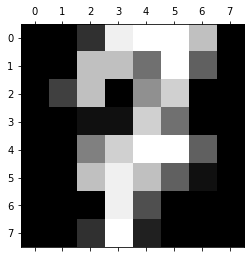

In [28]:
idx = outlier_rank[outlier_rank>9][0]
plt.gray()
plt.matshow(x2[idx].reshape(8,8))
plt.show() 

## 共変量シフトの下での回帰分析

## データ生成

In [29]:
# 真の回帰関数 
def f(x):            
    return (x+2)*(x-3)*x
# データ設定
ntr, mtr, sdtr   = 100, -1.4, 0.7
nte, mte, sdte = 100,  0.8, 0.8

In [30]:
# トレーニングデータ生成
xtr = np.random.normal(loc=mtr, scale=sdtr, size=ntr).reshape(ntr,1)
ytr = f(xtr) + np.random.normal(scale=2, size=ntr).reshape(ntr,1)
Xtr = np.c_[np.repeat(1,xtr.shape[0]),xtr] # データ行列

# テストデータ生成
xte = np.random.normal(loc=mte, scale=sdte, size=nte).reshape(nte,1)
yte = f(xte) + np.random.normal(scale=2, size=nte).reshape(nte,1) 
Xte = np.c_[np.repeat(1,xtr.shape[0]),xte] # データ行列

## データプロット

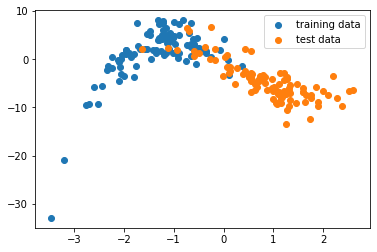

In [31]:
plt.scatter(xtr,ytr,  label="training data")
plt.scatter(xte,yte, label="test data")
plt.legend(); plt.show()

## トレーニングデータ点上での密度比

In [32]:
kdr = kernelDensityRatio(gamma=2)   # 密度比モデル設定：ガウスカーネルの幅 gamma =2
kdr.fit(xtr,xte)            # 学習
pr = kdr.predict(xtr)  #  xtr での密度比の予測

## 重み付き最小２乗法で回帰パラメータを推定

In [33]:
from sklearn import linear_model                                  # 線形モデルで推定

# 重み付き最小２乗法
cs = linear_model.LinearRegression()
cs.fit(Xtr, ytr, sample_weight=pr)

#　通常の最小２乗法
ls = linear_model.LinearRegression()
ls.fit(Xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## プロット：推定結果

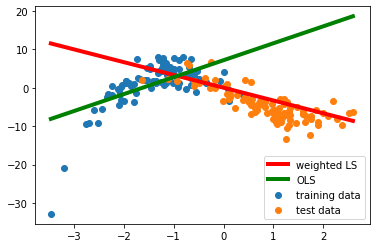

In [34]:
# 予測点のデータ行列
tX = np.c_[np.repeat(1,100), np.linspace(np.min(xtr),np.max(xte),100)]
py = cs.predict(tX); oy = ls.predict(tX)     # 回帰関数の値
# プロット
plt.scatter(xtr,ytr,  label="training data")
plt.scatter(xte,yte, label="test data")
plt.plot(tX[:,1],py,lw=4,c='red',label="weighted LS")
plt.plot(tX[:,1],oy,lw=4,c='green',label="OLS")
plt.legend(); plt.show()